# Preparing data
In this notebook we prepare data set for modeling. We removed unnessesary columns, refactor columns in bad format and dropw rows with empty values.

List of columns:\
id - Removed (Has only uniqe values)\
listing_url - Removed (Has only unique values)\
scrape_id - Removed (Has only one unique value)\
last_scraped - Removed (Has only one unique value)\
source - Removed (No added value for modeling)\
name - Removed (No added value for modeling)\
description - Removed (Only NaN values)\
neighborhood_overview - Removed (47 % null values)\
picture_url - Removed (Has only uniqe values)\
host_id - Removed (Price can not be predicted from id)\
host_url - Removed (Each host_url corresponds to a unique host_id)\
host_name - Remove (Price can not be predicted from host name)\
host_since - Converted to datetime\
host_location - Removed (Too wide categorial value)\
host_about - Removed (42 % null values)\
host_response_time - Changed data type to cetagory\
host_response_rate - Changed percetage to 0-1 scale\
host_acceptance_rate Changed percetage to 0-1 scale\
host_is_superhost - Changed to bool\
host_thumbnail_url - Removed (Column contain url)\
host_picture_url - Removed (Column contain url)\
host_neighbourhood - Removed (We used other column with location)\
host_listings_count - No changes\
host_total_listings_count - Removed (Corellated with host_listings_count)\
host_verifications - Chaged verification methods to count of verification methods\
host_has_profile_pic - Changed to bool\
host_identity_verified - Changed to bool\
neighbourhood - Removed (We used other column with location)\
neighbourhood_cleansed - Rename Prague parts to district names.\
neighbourhood_group_cleansed - Removed (Only null values)\
latitude  - No changes\
longitude - No changes\
property_type - Removed (We used other columns with type of space)\
room_type - Change to category type\
accommodates - No changes\
bathrooms - Removed (Only null values)\
bathrooms_text - Convert text description to count of bathrooms (float)\
bedrooms - Removed (Only null values)\
beds - No changes\
amenities - Removed (Has only one unique value)\
price - Remove dollar character and convert to float\
minimum_nights - No changes\
maximum_nights - No changes\
minimum_minimum_nights - Removed (We used other columnt whit this values)\
maximum_minimum_nights - Removed (We used other columnt whit this values)\
minimum_maximum_nights - Removed (We used other columnt whit this values)\
maximum_maximum_nights - Removed (We used other columnt whit this values)\
minimum_nights_avg_ntm - Removed (We used other columnt whit this values)\
maximum_nights_avg_ntm - Removed (We used other columnt whit this values)\
calendar_updated - Removed (Only null values)\
has_availability - Changed to bool\
availability_30\
availability_60\
availability_90\
availability_365\
calendar_last_scraped - Removed (Has only one unique value)\
number_of_reviews\
number_of_reviews_ltm\
number_of_reviews_l30d\
first_review\
last_review\
review_scores_rating\
review_scores_accuracy\
review_scores_cleanliness\
review_scores_checkin\
review_scores_communication\
review_scores_location\
review_scores_value\
license - Removed (Only null values)\
instant_bookable - Changed to bool\
calculated_host_listings_count\
calculated_host_listings_count_entire_homes\
calculated_host_listings_count_private_rooms\
calculated_host_listings_count_shared_rooms\
reviews_per_month


In [126]:
#Import packages and set jupyter
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)
#pd.set_option("display.max_rows", None)

In [127]:
#Load raw data and prepare dataframe
path_to_data = "C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/listings.csv.gz"

listings_data = pd.read_csv(path_to_data)

df = listings_data.copy()



In [128]:
#REMOVE
#df.head(3)

In [129]:
#data summary
df.describe(include='all')

#number of rows
rows=df.shape[0]
columns = df.shape[1]

print(f'Rows: {rows}, Columns: {columns}')

Rows: 9388, Columns: 75


In [130]:
#Define list with columns for removing
delete_cols=[]

In [131]:
#unique values
for column in df:
    print (f"{column}: {df[column].nunique()} unique values")

#columns with only unique values
unique_columns = []
for column in df.columns:
    if df[column].nunique() == len(df):
        unique_columns.append(column)

print(unique_columns)

# -> all rows are unique
# -> delete listing_url, picture_url

del1 = "id","listing_url","picture_url"

delete_cols.extend(del1)



id: 9388 unique values
listing_url: 9388 unique values
scrape_id: 1 unique values
last_scraped: 1 unique values
source: 2 unique values
name: 6920 unique values
description: 0 unique values
neighborhood_overview: 3151 unique values
picture_url: 9012 unique values
host_id: 3267 unique values
host_url: 3267 unique values
host_name: 1418 unique values
host_since: 2191 unique values
host_location: 196 unique values
host_about: 1470 unique values
host_response_time: 4 unique values
host_response_rate: 50 unique values
host_acceptance_rate: 92 unique values
host_is_superhost: 2 unique values
host_thumbnail_url: 3116 unique values
host_picture_url: 3116 unique values
host_neighbourhood: 134 unique values
host_listings_count: 69 unique values
host_total_listings_count: 89 unique values
host_verifications: 6 unique values
host_has_profile_pic: 2 unique values
host_identity_verified: 2 unique values
neighbourhood: 229 unique values
neighbourhood_cleansed: 51 unique values
neighbourhood_group_cle

In [132]:
#find columns with only one variable
single_variable_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        single_variable_columns.append(column)

print(single_variable_columns)

# -> delete scrape_id, last_scraped,amenities, calendar_last_scraped

delete_cols.extend(single_variable_columns)

['scrape_id', 'last_scraped', 'amenities', 'calendar_last_scraped']


In [133]:
source_uv = df["source"].unique()

# Print all unique values
print("Unique values in column '{}':".format("source"))
for value in source_uv:
    print(value)

#delete source
delete_cols.append("source")


Unique values in column 'source':
city scrape
previous scrape


In [134]:
print(df["name"].value_counts())
#delete name
delete_cols.append("name")

name
Rental unit in Praha 1 · ★New · 1 bedroom · 1 bed · 1 bath                  93
Rental unit in Praha 2 · ★New · 1 bedroom · 1 bed · 1 bath                  52
Rental unit in Praha 1 · 1 bedroom · 1 bed · 1 bath                         50
Rental unit in Prague · 1 bedroom · 2 beds · 1 bath                         27
Rental unit in Praha 3 · 1 bedroom · 1 bed · 1 bath                         27
                                                                            ..
Hostel in Praha 2 · ★4.08 · 1 bedroom · 4 beds · 11 shared baths             1
Hostel in Praha 2 · ★4.44 · 1 bedroom · 6 beds · 11 shared baths             1
Rental unit in Praha 13 · 2 bedrooms · 4 beds · 1 bath                       1
Serviced apartment in Praha 2 · ★4.41 · 3 bedrooms · 10 beds · 1.5 baths     1
Bed and breakfast in Praha 3 · ★New · 1 bedroom · 1 bed · 1 bath             1
Name: count, Length: 6920, dtype: int64


In [135]:
# columns with only NaN values
df.isnull().sum()

na_columns = []
for column in df.columns:
    if df[column].isnull().all():
        na_columns.append(column)

print(na_columns)

df.columns
# -> delete description, neighbourhood_group_cleansed, bathrooms, bedrooms, calendar_updated, license  
delete_cols.extend(na_columns) 

['description', 'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated', 'license']


In [136]:
# neighborhood_overview

neighborhood_uv = df["neighborhood_overview"].unique()

print(df["neighborhood_overview"].dtype)

#Print all unique values
print("Unique values in column '{}':".format("neighborhood_overview"))
for value in neighborhood_uv:
    print(value)

(df["neighborhood_overview"].isnull().sum())/rows

# 47% are nulls -> delete

delete_cols.append("neighborhood_overview")



object
Unique values in column 'neighborhood_overview':
nan
This apartment offers a fantastic location. You will be able to explore central Prague's attractions (no need for public transport).<br />So close to Central Station with "no issue" transport connections. <br />Airport Express bus (shuttle to the airport leaving every 30min) stops 2 minutes away.<br />You have a supermarket located 2 minutes away and the fashionable shopping streets and malls a short way away.<br />National Museum and Municipal House are 5 minutes away from the apartment.<br />Close to the best restaurants, coffee shops, pubs...<br />Closest metro station is Hlavni Nadrazi (2 min walk) Closest tram station, 1 min walk.
The apartment location allows to get deeper into the life of the Old and New Town in the same time with a specific unforgettable atmosphere, wagging streets with small medieval squares and numerous cafes and restaurants. It all promises an unforgettable experience of your visit to Prague. <br />

In [137]:
#host_id

df["host_id"].value_counts()

#host_url

unique_combinations = df.groupby(['host_url', 'host_id']).size().reset_index(name='count')
duplicates = unique_combinations[unique_combinations.duplicated(subset=['host_url'], keep=False)]

if duplicates.empty:
    print("Each host_url corresponds to a unique host_id.")
else:
    print("Some host_url values correspond to multiple host_id values.")

# -> delete host_url, host_id  

delete_cols.extend(["host_url","host_id"])

Each host_url corresponds to a unique host_id.


In [138]:
#host_name

unique_combinations = df.groupby(['host_name', 'host_id']).size().reset_index(name='count')
duplicates = unique_combinations[unique_combinations.duplicated(subset=['host_name'], keep=False)]

if duplicates.empty:
    print("Each host_name corresponds to a unique host_id.")
else:
    print("Some host_names values correspond to multiple host_id values.")

# -> delete host_name   
delete_cols.append("host_name") 

Some host_names values correspond to multiple host_id values.


In [139]:
#host_since
df["host_since"].value_counts()

# Convert "host_since" column to datetime format
df["host_since"] = pd.to_datetime(df["host_since"])

#extract year 
df["host_since"] = df["host_since"].dt.year

print(df["host_since"].value_counts())


host_since
2016    1253
2015    1151
2023     887
2022     763
2018     740
2014     707
2013     693
2019     684
2017     625
2012     613
2011     409
2021     370
2020     281
2010     133
2008      74
2009       5
Name: count, dtype: int64


In [140]:
#host_location

df["host_location"].value_counts()

# -> delete host_location
delete_cols.append("host_location") 

In [141]:
#host about

host_abt_uv = df["host_about"].unique()

#Print all unique values
print("Unique values in column '{}':".format("host_about"))
for value in host_abt_uv:
    print(value)

(df["host_about"].isnull().sum())/rows

# 42% are nulls-> delete

delete_cols.append("host_about")

Unique values in column 'host_about':
Hello, 
glad to see that you are interested in our beautiful city, Prague!

My name is Klara, I’m 25 years old and I live in Prague - magical Central European city. I love nature and great food (preferably Asian and Italian cuisine). I have recently fallen for jogging – it boosts me with energy and perfectly prepares for a new day. I also love adrenaline experiences in general - camping, all kinds of sports (skiing, squash or badminton) or even rafting.

I work with a group of young enthusiastic people (mostly students) and together we are renting a number of apartments in the centre of Prague here on Airbnb. I have a lot of experience with tourism, since I work in hospitality industry for a fifth year now. That’s why I can recommend a lot of great and interesting cafés, restaurants and secret places only the locals know. It's my passion (and also the passion of my team) to get to know new people, new cultures and experience something interesting e

In [142]:
#host_response_time

df["host_response_time"].value_counts()

# Define the categories for host response time
categories = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']

# Convert the "host_response_time" column to categorical data type
df["host_response_time"] = df["host_response_time"].astype(pd.CategoricalDtype(categories=categories, ordered=True))

print(df["host_response_time"].dtype)


category


In [143]:
#host_response_rate


df["host_response_rate"].value_counts()

df["host_response_rate"] = (df["host_response_rate"].str.rstrip('%').astype(float))/100

df["host_response_rate"].value_counts()


host_response_rate
1.00    6434
0.98     323
0.99     217
0.90     192
0.00     122
0.80      98
0.96      70
0.95      66
0.94      52
0.97      47
0.50      45
0.88      41
0.46      38
0.83      38
0.67      33
0.92      31
0.81      30
0.86      29
0.82      25
0.93      23
0.33      23
0.70      23
0.91      18
0.75      17
0.69      15
0.10      14
0.40      14
0.06      14
0.68      12
0.60      11
0.89      10
0.20      10
0.78       8
0.73       7
0.74       6
0.08       6
0.25       6
0.87       6
0.71       6
0.17       5
0.72       4
0.23       3
0.30       3
0.14       3
0.85       2
0.63       2
0.79       2
0.29       1
0.77       1
0.43       1
Name: count, dtype: int64

In [144]:
#host_acceptance_rate

df["host_acceptance_rate"].value_counts()

df["host_acceptance_rate"] = (df["host_acceptance_rate"].str.rstrip('%').astype(float))/100

df["host_acceptance_rate"].value_counts()

host_acceptance_rate
1.00    4707
0.99    1062
0.98     477
0.97     221
0.96     182
        ... 
0.04       1
0.30       1
0.35       1
0.06       1
0.22       1
Name: count, Length: 92, dtype: int64

In [145]:
#find columns with only one variable
single_variable_columns = []
for column in df.columns:
    if df[column].nunique() == 2:
        single_variable_columns.append(column)

print(single_variable_columns)



boolean_columns = ["host_is_superhost",
                   "host_has_profile_pic",
                   "host_identity_verified",
                   "has_availability",
                   "instant_bookable"]

for column in boolean_columns:
    df[column] = df[column].replace({'t': True, 'f': False})#.fillna(0).astype(int)
    df[column] = df[column].astype(bool)


#delete_cols.append("has_availability")

df["host_is_superhost"].value_counts()


['source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']


C:\Users\filip\AppData\Local\Temp\ipykernel_22264\4173855261.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'t': True, 'f': False})#.fillna(0).astype(int)
C:\Users\filip\AppData\Local\Temp\ipykernel_22264\4173855261.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'t': True, 'f': False})#.fillna(0).astype(int)
C:\Users\filip\AppData\Local\Temp\ipykernel_22264\4173855261.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

host_is_superhost
False    5907
True     3481
Name: count, dtype: int64

In [146]:
#host_thumbnail_url, host_picture_url

# Filter the DataFrame where host_has_profile_pic is 1
filtered_df = df[df['host_has_profile_pic'] == 1]

# Check if host_thumbnail_url and host_picture_url columns contain non-null values
has_images = (filtered_df['host_thumbnail_url'].notnull()) & (filtered_df['host_picture_url'].notnull())

# Print the result
print("Presence of host_thumbnail_url and host_picture_url when host_has_profile_pic is 1:")
print(has_images.any())

del2 ="host_thumbnail_url", "host_picture_url"
# -> delete host_name   
delete_cols.extend(del2) 

Presence of host_thumbnail_url and host_picture_url when host_has_profile_pic is 1:
True


In [147]:
#host_neighbourhood	

df["host_neighbourhood"].value_counts()

# -> delete host_neighbourhood   

delete_cols.append("host_neighbourhood") 

In [148]:
#host_listings_count, host_total_listings_count	

# Group the DataFrame by the ID column
grouped = df.groupby('id')

# Check if the count of unique values in host_listings_count and host_total_listings_count is 1 within each group
same_counts = grouped.apply(lambda x: x['host_listings_count'].nunique() == 1 and x['host_total_listings_count'].nunique() == 1)

# Print the result
print("For rows with the same ID, host_listings_count and host_total_listings_count are the same:", same_counts.all())

#delete
delete_cols.append("host_total_listings_count") 

df["host_total_listings_count"].value_counts()
# -> do something with outliers


For rows with the same ID, host_listings_count and host_total_listings_count are the same: True


C:\Users\filip\AppData\Local\Temp\ipykernel_22264\2437511979.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  same_counts = grouped.apply(lambda x: x['host_listings_count'].nunique() == 1 and x['host_total_listings_count'].nunique() == 1)


host_total_listings_count
1       1377
2        780
3        609
4        515
6        400
        ... 
5522       2
38         1
46         1
1500       1
93         1
Name: count, Length: 89, dtype: int64

In [149]:
#host_verifications

# Convert string representation of lists to actual lists
df['host_verifications'] = df['host_verifications'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Count the number of items in each list
df['count_verifications'] = df['host_verifications'].apply(lambda x: len(x))

df['count_verifications'].value_counts()


count_verifications
2    7258
3    1427
1     703
Name: count, dtype: int64

In [150]:
#neighbourhood

df["neighbourhood"].value_counts()

#delete
delete_cols.append("neighbourhood") 

In [151]:
#neighbourhood_cleansed	

df["neighbourhood_cleansed"].value_counts()

mapping = {
    'Koloděje': 'Praha 21',
    'Dolní Chabry': 'Praha 8',
    'Štěrboholy': 'Praha 15',
    'Nebušice': 'Praha 6',
    'Klánovice': 'Praha 21',
    'Ďáblice': 'Praha 8',
    'Vinoř': 'Praha 19',
    'Přední Kopanina': 'Praha 6',
    'Lysolaje': 'Praha 6',
    'Libuš': 'Praha 12',
    'Troja': 'Praha 7',
    'Kunratice': 'Praha 4',
    'Šeberov': 'Praha 11',
    'Újezd': 'Praha 11',
    'Dubeč': 'Praha 15',
    'Petrovice': 'Praha 15',
    'Řeporyje': 'Praha 13',
    'Slivenec': 'Praha 5',
    'Dolní Počernice': 'Praha 14',
    'Březiněves': 'Praha 8',
    'Satalice': 'Praha 19',
    'Čakovice': 'Praha 18',
    'Lipence': 'Praha 16',
    'Velká Chuchle': 'Praha 16',
    'Zbraslav': 'Praha 16',
    'Zličín': 'Praha 17',
    'Nedvězí': 'Praha 22',
    'Dolní Měcholupy': 'Praha 15',
    'Suchdol': 'Praha 6',
    'Kolovraty': 'Praha 22'
}


df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: mapping[x] if x in mapping else x)

df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Praha 1     3477
Praha 2     1833
Praha 3      988
Praha 5      747
Praha 8      506
Praha 7      393
Praha 6      331
Praha 10     328
Praha 4      327
Praha 9       97
Praha 13      71
Praha 12      48
Praha 11      42
Praha 15      41
Praha 14      37
Praha 16      35
Praha 17      25
Praha 18      20
Praha 22      13
Praha 21      13
Praha 19      12
Praha 20       4
Name: count, dtype: int64

In [152]:
#latitude, longtitude

print(df["latitude"].dtype, df["longitude"].dtype)

#both float -> keep



float64 float64


In [153]:
#property_type

df["property_type"].value_counts()

#delete
delete_cols.append("property_type") 

In [154]:
#room_type

df["room_type"].value_counts()

# Define the categories for room_type
categories = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# Convert the "host_response_time" column to categorical data type
df["room_type"] = df["room_type"].astype(pd.CategoricalDtype(categories=categories))

print(df["room_type"].dtype)


category


In [155]:
#accommodates

df["accommodates"].value_counts()

# -> do something with outliers

accommodates
2     3216
4     2334
3     1149
6      929
5      525
8      308
1      281
7      160
10     130
9       94
16      93
12      76
11      35
14      28
13      19
15      11
Name: count, dtype: int64

In [156]:
#bathrooms_text

df["bathrooms_text"].value_counts()

import re

def convert_to_float(value):
    if isinstance(value, str):
        if 'half-bath' in value.lower():
            return 0.5
        else:
            numbers = re.findall(r'\d+\.\d+|\d+', value)
            if numbers:
                return float(numbers[0])
    return None  ### nebo dáme NaN??

df['bathrooms_text'] = df['bathrooms_text'].apply(convert_to_float)

print(df['bathrooms_text'])

0       1.0
1       1.0
2       1.5
3       1.0
4       1.0
       ... 
9383    1.0
9384    1.0
9385    1.0
9386    1.0
9387    1.0
Name: bathrooms_text, Length: 9388, dtype: float64


In [157]:
#beds

df["beds"].value_counts()
df["beds"].dtype



dtype('float64')

In [158]:
#amenities	

df["amenities"].value_counts()

#delete
delete_cols.append("amenities") 

In [159]:
#price	

df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)
df.drop("price", axis=1, inplace=True)



In [160]:
#minimum_nights, maximum_nights	

df["minimum_nights"].value_counts()
df["maximum_nights"].value_counts()

#check outliers

mmdel = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

#delete
delete_cols.extend(mmdel) 

c:\Users\filip\anaconda3\envs\rotf00\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


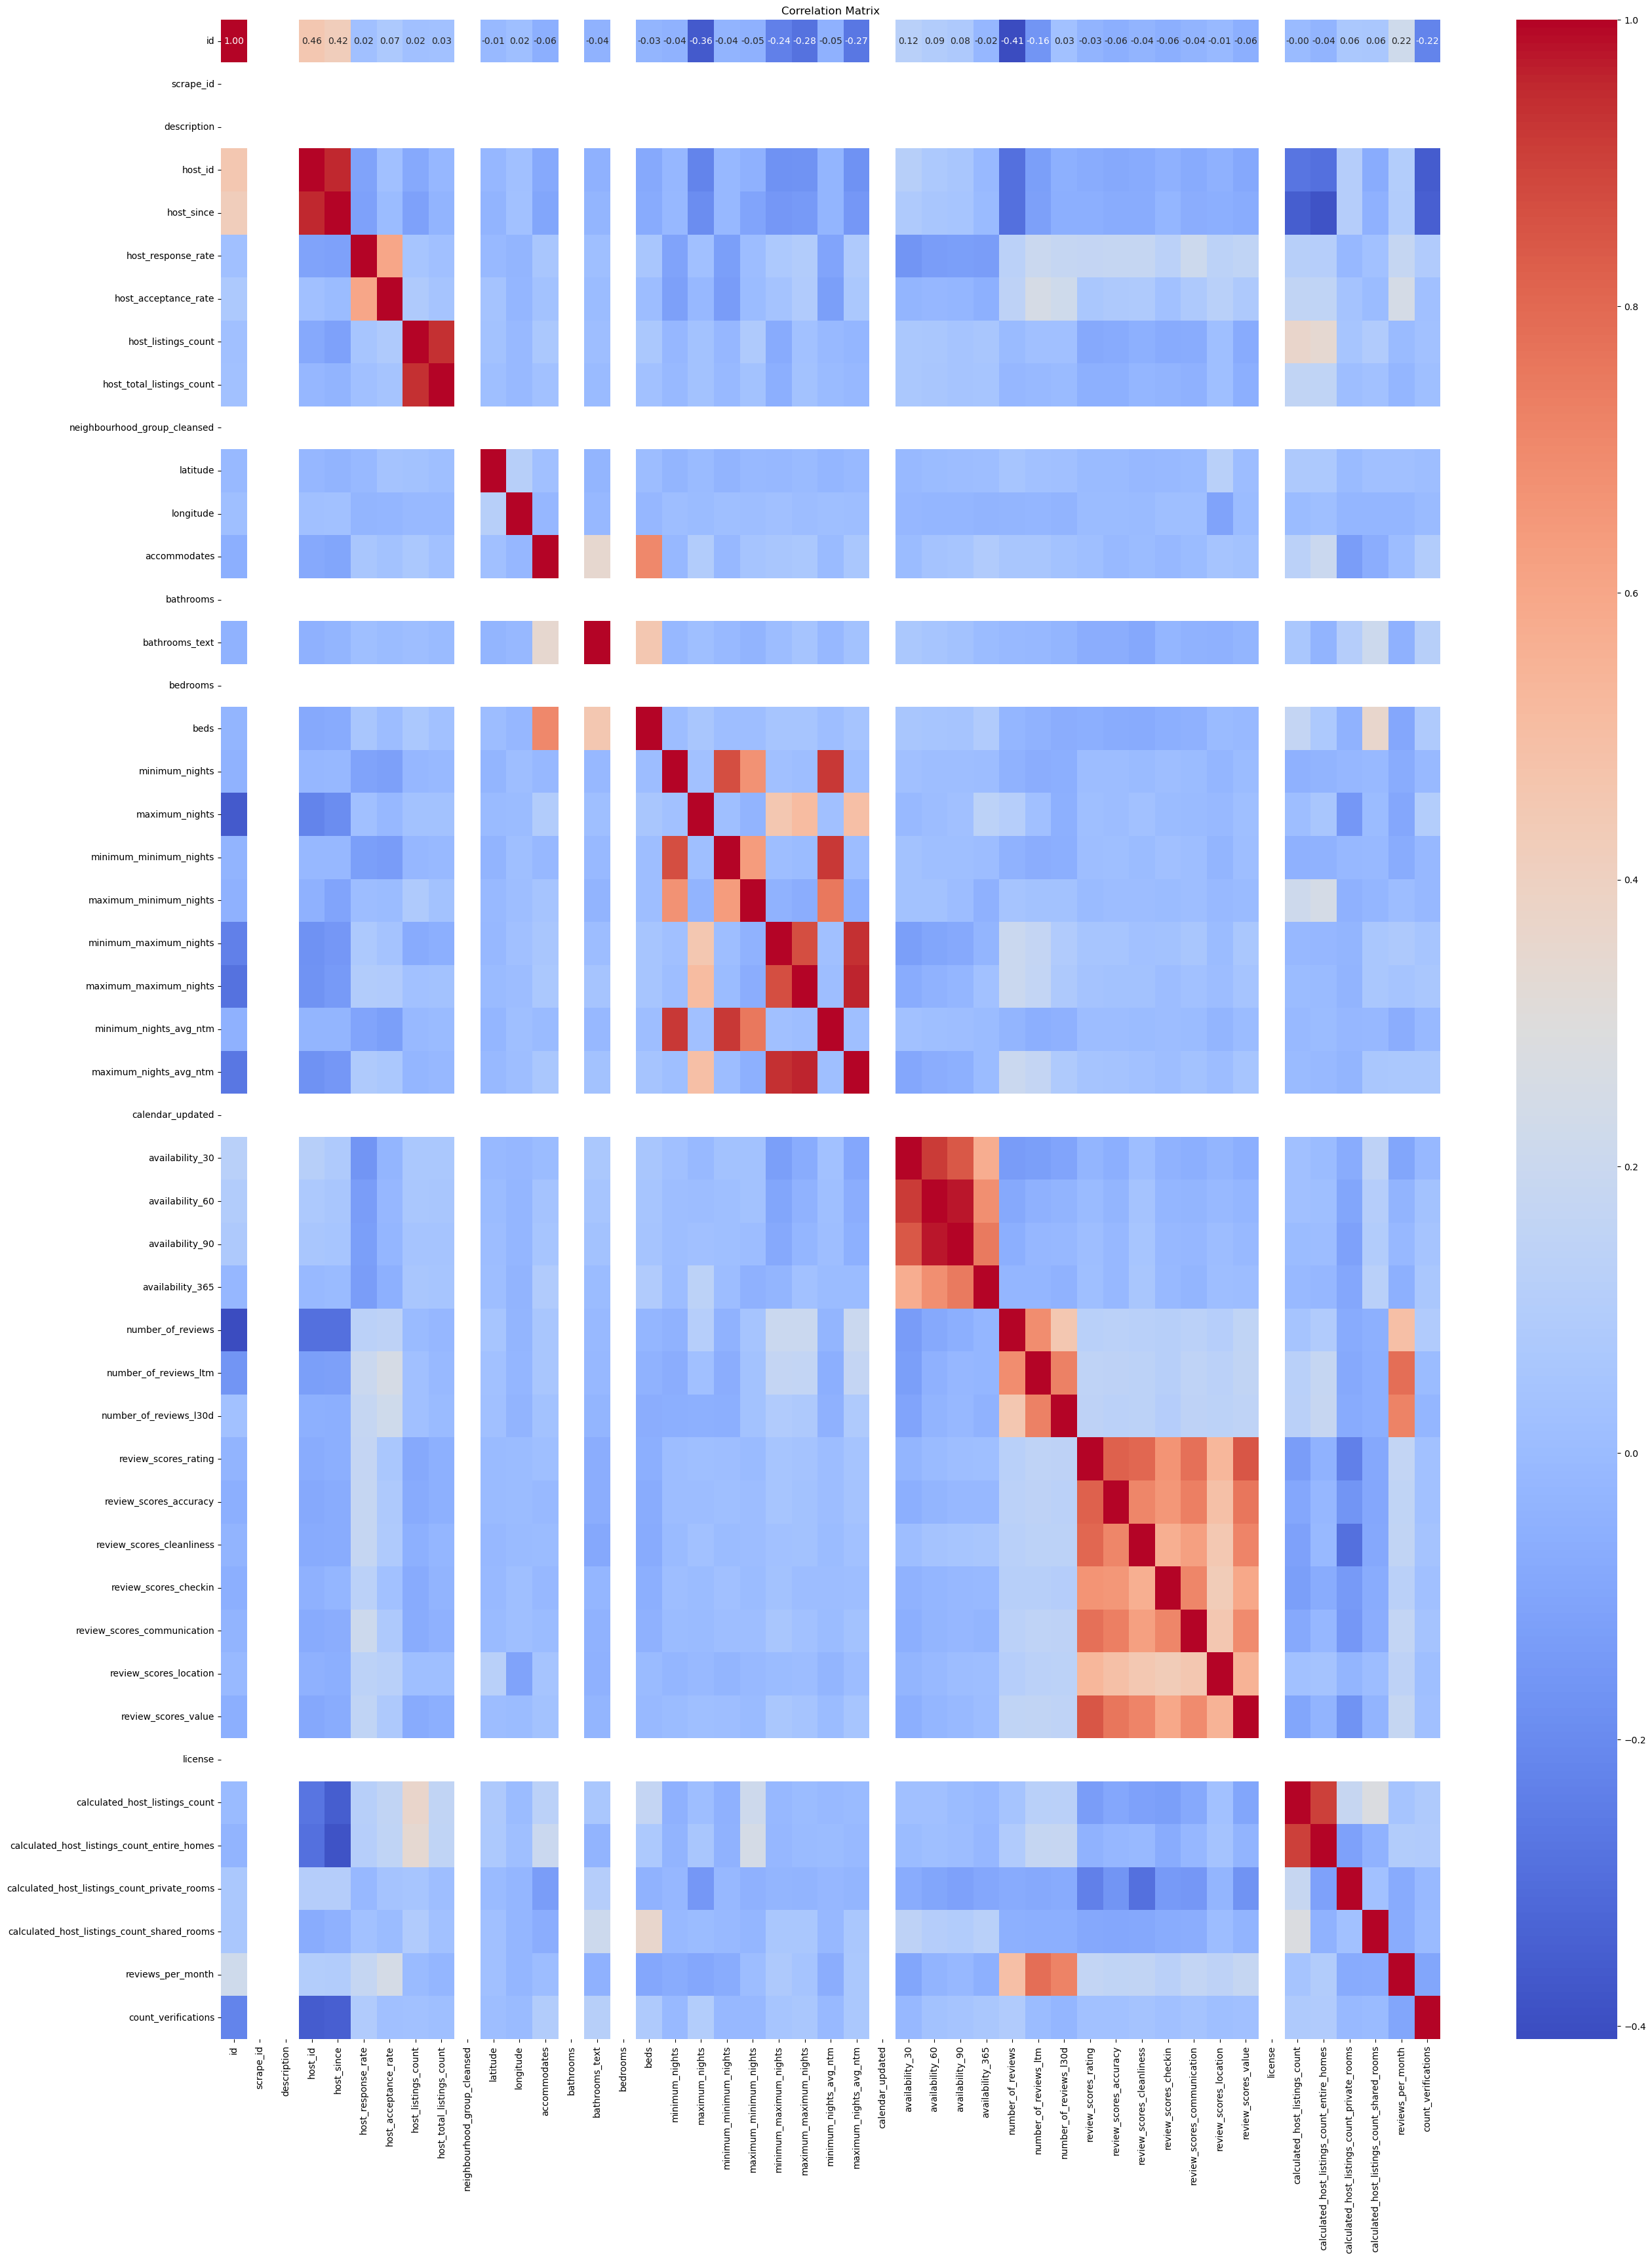

In [161]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(30, 40)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [162]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',

In [170]:
# calculation of average availability to one column
df['seasonal_availability'] = (df['availability_30'] / 30 + df['availability_60'] / 60 +
                               df['availability_90'] / 90 + df['availability_365'] / 365) / 4

# function about categorizing availability
def categorize_season(availability):
    if availability < 0.33:
        return 'Low'
    elif availability < 0.66:
        return 'Medium'
    else:
        return 'High'

# function to create new column 'season'
df['season'] = df['seasonal_availability'].apply(categorize_season)

# deleting previous availability columns
df.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)


KeyError: 'availability_30'